In [11]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

## Exploratory Data Analysis:

In [12]:
pd.read_csv("../input/house-prices-advanced-regression-techniques/sample_submission.csv")
#Here we learn that SalePrice is the target column

,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977
...,...,...
1454,2915,167081.220949
1455,2916,164788.778231
1456,2917,219222.423400
1457,2918,184924.279659


In [13]:
pd.read_fwf("../input/house-prices-advanced-regression-techniques/data_description.txt")


,MSSubClass: Identifies the type of dwelling involved in the sale.,Unnamed: 1
0,20\t1-STORY 1946 & NEWER ALL STYLES,NaN
1,30\t1-STORY 1945 & OLDER,NaN
2,40\t1-STORY W/FINISHED ATTIC ALL AGES,NaN
3,45\t1-1/2 STORY - UNFINISHED ALL AGES,NaN
4,50\t1-1/2 STORY FINISHED ALL AGES,NaN
...,...,...
393,"Abnorml\tAbnormal Sale - trade, foreclosure, ...",NaN
394,AdjLand\tAdjoining Land Purchase,NaN
395,Alloca\tAllocation - two linked properties wit...,", typica"
396,Family\tSale between family members,NaN


In [14]:
df= pd.read_csv("../input/house-prices-advanced-regression-techniques/train.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [15]:
test=pd.read_csv("../input/house-prices-advanced-regression-techniques/test.csv")
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [16]:
df.describe() # we get all the statistical information of all the numerical data

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


SalePrice column is our target 

In [17]:
y=df["SalePrice"].values

<AxesSubplot:xlabel='SalePrice', ylabel='Count'>

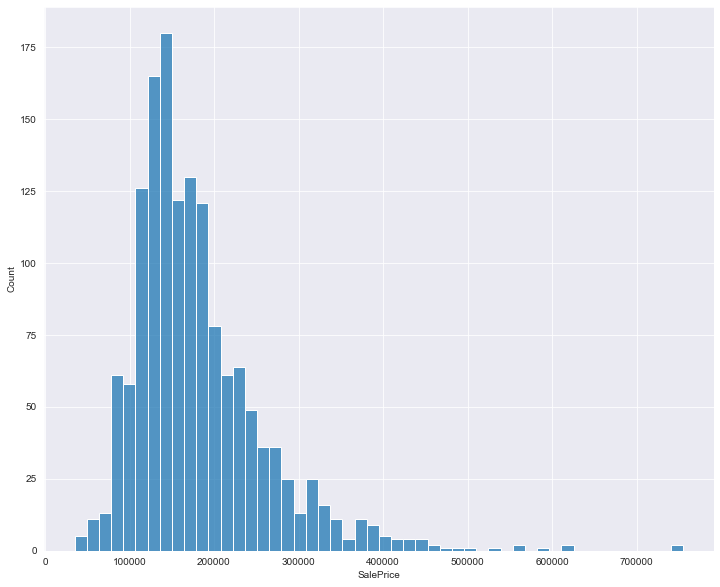

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12,10))
sns.set_style("darkgrid")
sns.histplot(data=df, x="SalePrice", bins=50,cbar=True)
#It seem that majority of the prices are between 100 000 and 250 000

<font color="blue">
The SalePrice is skewed to the right.SalePrice is not normally distributed, so we need to adjust it.

In [19]:
# Skew and kurtosis for SalePrice 
print("Skewness: %f" % df['SalePrice'].skew())
print("Kurtosis: %f" % df['SalePrice'].kurt())

Skewness: 1.882876
Kurtosis: 6.536282


In [20]:
#Applying log transformation to remove skewness and make target variable normally distributed
df['SalePrice'] = np.log1p(df['SalePrice'])

<AxesSubplot:xlabel='SalePrice', ylabel='Count'>

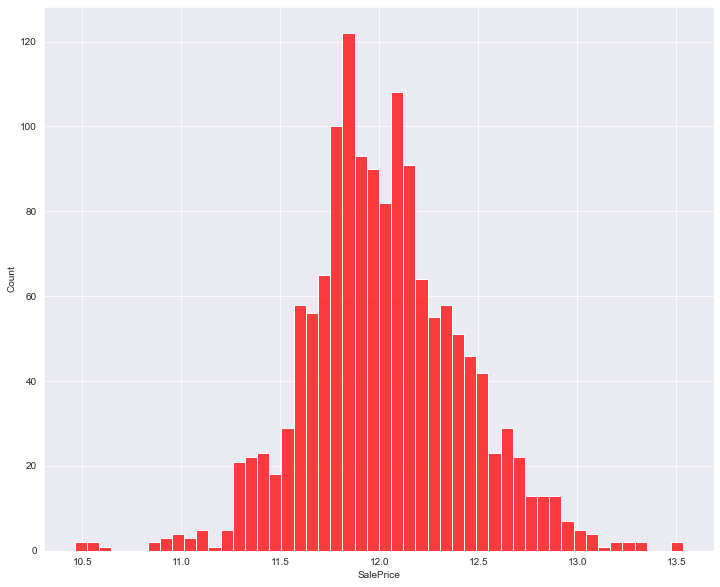

In [21]:
plt.figure(figsize=(12,10))
sns.set_style("darkgrid")
sns.histplot(data=df, x="SalePrice", bins=50,cbar=True,color="red")
#Now it is normally distributed

<AxesSubplot:xlabel='SalePrice'>

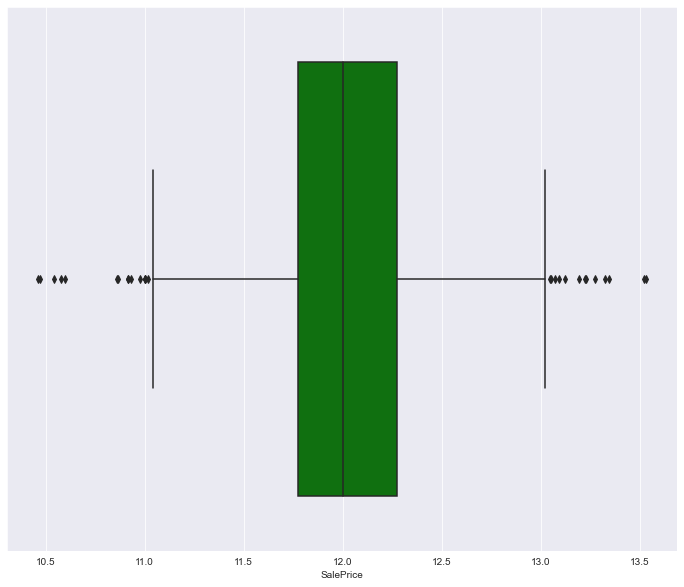

In [22]:
plt.figure(figsize=(12,10))
sns.boxplot(data=df, x="SalePrice",color="green")


In [23]:
df["SalePrice"].describe() 
#The mean price is 180 921 and standart deviation is 79 442 and its very high

count    1460.000000
mean       12.024057
std         0.399449
min        10.460271
25%        11.775105
50%        12.001512
75%        12.273736
max        13.534474
Name: SalePrice, dtype: float64

In [24]:
df.corr()["SalePrice"].sort_values(ascending=False)
#Here we list the correlation between the target and other features from the highest to the negative ones
#It seem the overall quality has the highest positive correlation with the target

SalePrice        1.000000
OverallQual      0.817185
GrLivArea        0.700927
GarageCars       0.680625
GarageArea       0.650888
TotalBsmtSF      0.612134
1stFlrSF         0.596981
FullBath         0.594771
YearBuilt        0.586570
YearRemodAdd     0.565608
GarageYrBlt      0.541073
TotRmsAbvGrd     0.534422
Fireplaces       0.489450
MasVnrArea       0.430809
BsmtFinSF1       0.372023
LotFrontage      0.355879
WoodDeckSF       0.334135
OpenPorchSF      0.321053
2ndFlrSF         0.319300
HalfBath         0.313982
LotArea          0.257320
BsmtFullBath     0.236224
BsmtUnfSF        0.221985
BedroomAbvGr     0.209043
ScreenPorch      0.121208
PoolArea         0.069798
MoSold           0.057330
3SsnPorch        0.054900
BsmtFinSF2       0.004832
BsmtHalfBath    -0.005149
Id              -0.017942
MiscVal         -0.020021
OverallCond     -0.036868
YrSold          -0.037263
LowQualFinSF    -0.037963
MSSubClass      -0.073959
KitchenAbvGr    -0.147548
EnclosedPorch   -0.149050
Name: SalePr

<AxesSubplot:>

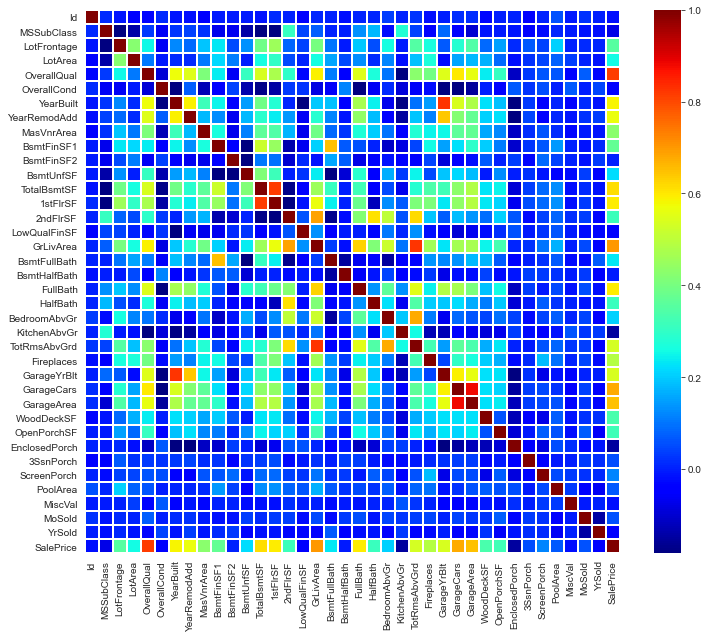

In [25]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(),cmap="jet",annot=False,linewidths=1,robust=True)

<AxesSubplot:xlabel='OverallQual', ylabel='SalePrice'>

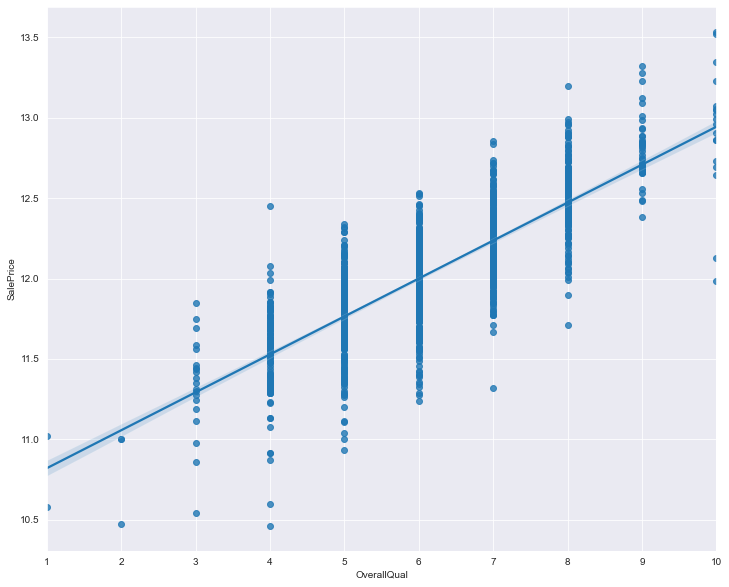

In [26]:
plt.figure(figsize=(12,10))
sns.regplot(x="OverallQual", y="SalePrice",data=df)
#OverallQual has the highest positive correlation with the target 

<AxesSubplot:xlabel='KitchenAbvGr', ylabel='SalePrice'>

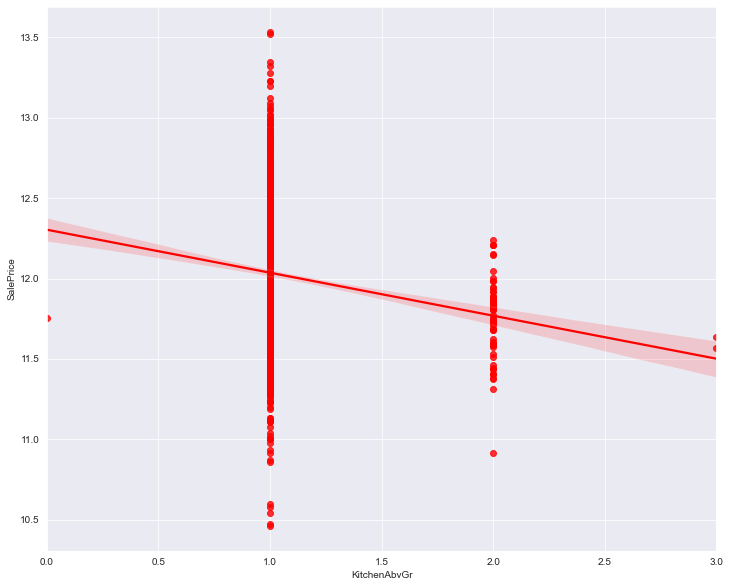

In [27]:
plt.figure(figsize=(12,10))
sns.regplot(x="KitchenAbvGr", y="SalePrice",data=df,color="red")
#KitchenAbvGr has the highest negative correlation with the target

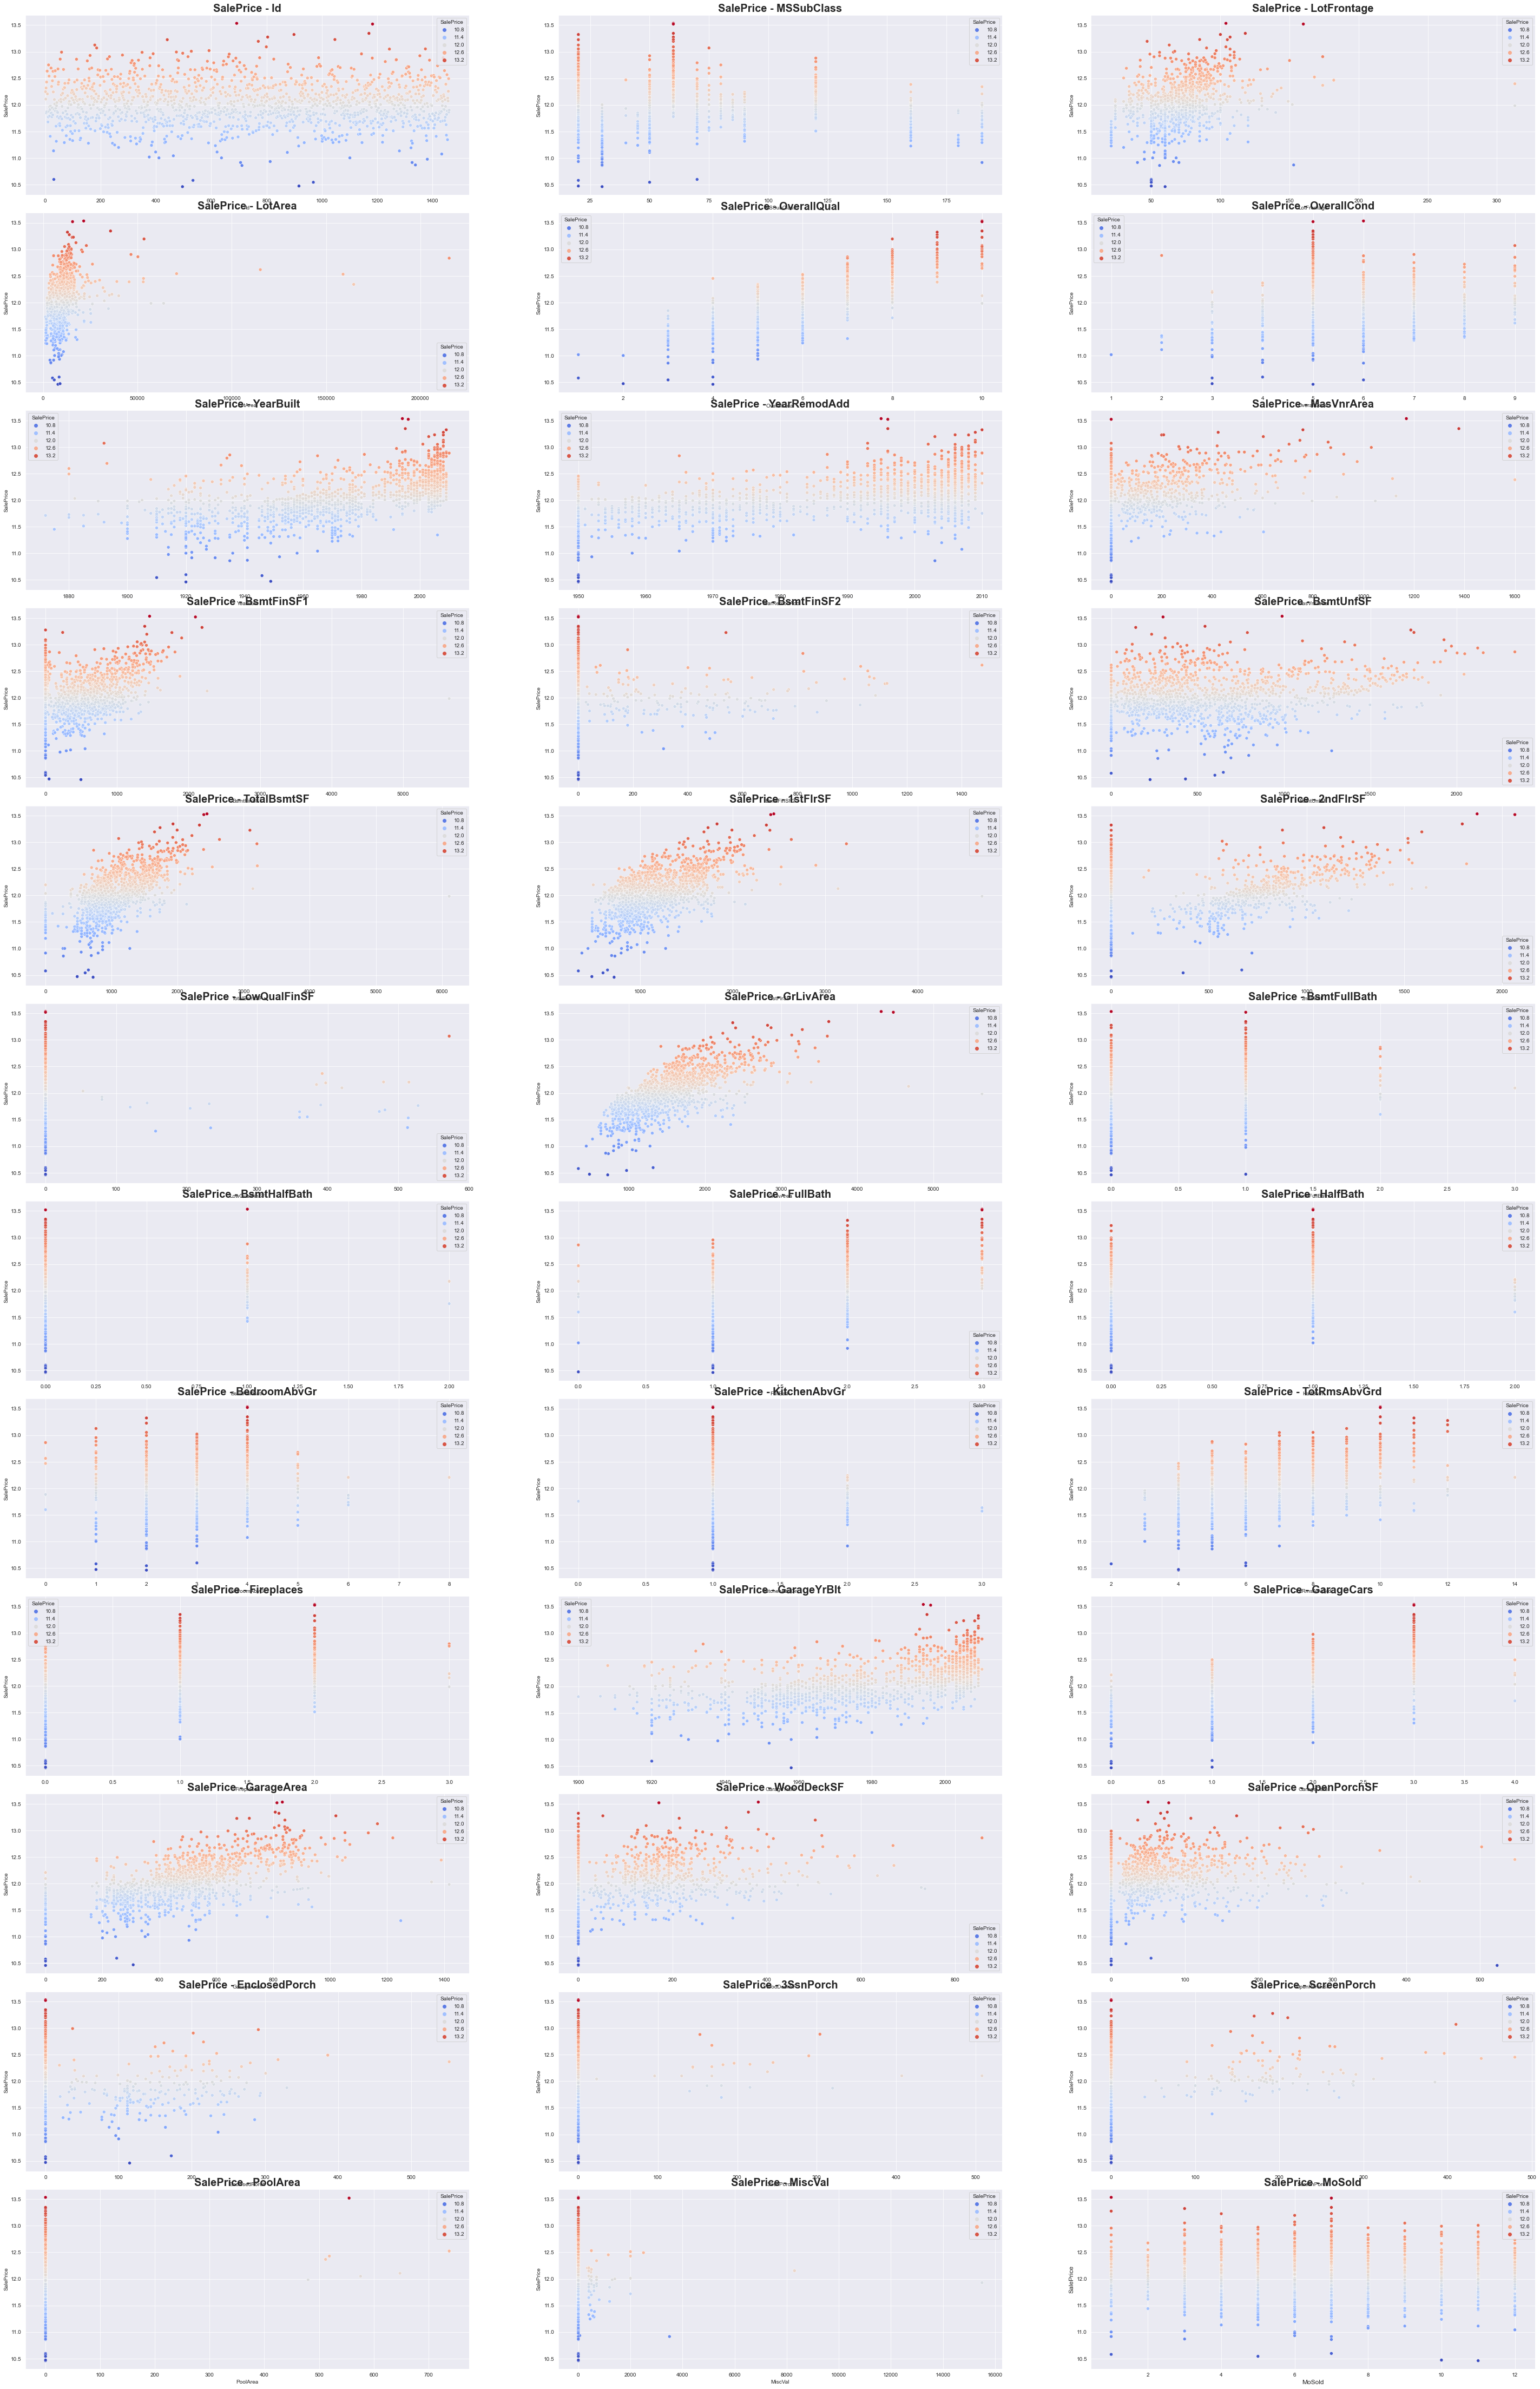

In [33]:
#Visualising numerical predictor variables with Target Variables
train_num = df.select_dtypes(include=['int64','float64'])
fig,axs= plt.subplots(12,3,figsize=(50,80))
#adjust horizontal space between plots 
fig.subplots_adjust(hspace=0.1)
for i,ax in zip(train_num.columns,axs.flatten()):
    sns.scatterplot(x=i, y='SalePrice', hue='SalePrice',data=train_num,ax=ax,palette='coolwarm')
    plt.xlabel(i,fontsize=12)
    plt.ylabel('SalePrice',fontsize=12)
    #ax.set_yticks(np.arange(0,900001,100000))
    ax.set_title('SalePrice'+' - '+str(i),fontweight='bold',size=20)

/opt/conda/lib/python3.7/site-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


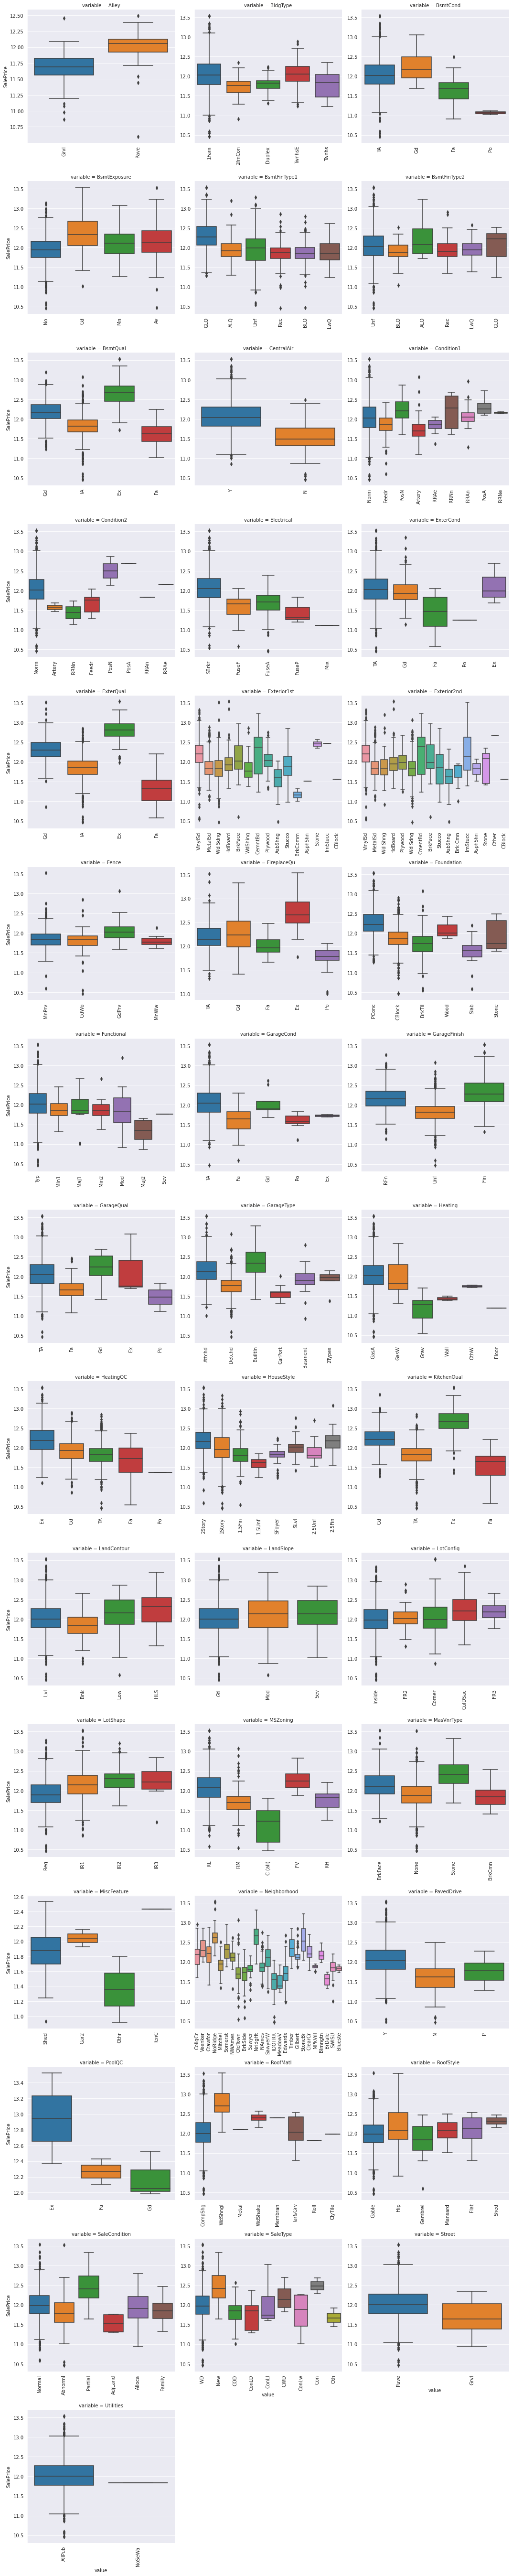

In [ ]:
##Visualising Categorical predictor variables with Target Variables
categorical = df.select_dtypes(exclude=['int64','float64'])
def facetgrid_boxplot(x, y, **kwargs):
    sns.boxplot(x=x, y=y)
    x=plt.xticks(rotation=90)
    

f = pd.melt(df, id_vars=['SalePrice'], value_vars=sorted(df[categorical.columns]))
g = sns.FacetGrid(f, col="variable", col_wrap=3, sharex=False, sharey=False, size=5)
g = g.map(facetgrid_boxplot, "value", "SalePrice")

## 2. Prepare the Data Before Applying Machine Learning Algorithms

<font color="red">
2.1. Handling the Missing Values:

In [ ]:
num_cols=df.columns[df.dtypes!= "object"]
cat_cols=df.columns[df.dtypes== "object"]
test_num_cols=test.columns[test.dtypes!= "object"]
test_cat_cols=test.columns[test.dtypes== "object"]

In [ ]:
df[num_cols].isnull().sum().sort_values(ascending=False)
#We have only 3 numerical columns with missing values

LotFrontage      259
GarageYrBlt       81
MasVnrArea         8
Id                 0
OpenPorchSF        0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageCars         0
GarageArea         0
WoodDeckSF         0
EnclosedPorch      0
HalfBath           0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
BedroomAbvGr       0
FullBath           0
MSSubClass         0
BsmtFinSF2         0
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
BsmtFinSF1         0
BsmtUnfSF          0
BsmtHalfBath       0
TotalBsmtSF        0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
SalePrice          0
dtype: int64

In [ ]:
test[test_num_cols].isnull().sum().sort_values(ascending=False)

LotFrontage      227
GarageYrBlt       78
MasVnrArea        15
BsmtHalfBath       2
BsmtFullBath       2
BsmtFinSF2         1
GarageCars         1
GarageArea         1
TotalBsmtSF        1
BsmtUnfSF          1
BsmtFinSF1         1
KitchenAbvGr       0
3SsnPorch          0
EnclosedPorch      0
OpenPorchSF        0
WoodDeckSF         0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
Fireplaces         0
TotRmsAbvGrd       0
Id                 0
BedroomAbvGr       0
HalfBath           0
FullBath           0
MSSubClass         0
GrLivArea          0
LowQualFinSF       0
2ndFlrSF           0
1stFlrSF           0
YearRemodAdd       0
YearBuilt          0
OverallCond        0
OverallQual        0
LotArea            0
YrSold             0
dtype: int64

In [ ]:
df[num_cols].isnull().sum().sort_values(ascending=False)/len(df)
#Their percentage is not so high and we can fill the missing values

LotFrontage      0.177397
GarageYrBlt      0.055479
MasVnrArea       0.005479
Id               0.000000
OpenPorchSF      0.000000
KitchenAbvGr     0.000000
TotRmsAbvGrd     0.000000
Fireplaces       0.000000
GarageCars       0.000000
GarageArea       0.000000
WoodDeckSF       0.000000
EnclosedPorch    0.000000
HalfBath         0.000000
3SsnPorch        0.000000
ScreenPorch      0.000000
PoolArea         0.000000
MiscVal          0.000000
MoSold           0.000000
YrSold           0.000000
BedroomAbvGr     0.000000
FullBath         0.000000
MSSubClass       0.000000
BsmtFinSF2       0.000000
LotArea          0.000000
OverallQual      0.000000
OverallCond      0.000000
YearBuilt        0.000000
YearRemodAdd     0.000000
BsmtFinSF1       0.000000
BsmtUnfSF        0.000000
BsmtHalfBath     0.000000
TotalBsmtSF      0.000000
1stFlrSF         0.000000
2ndFlrSF         0.000000
LowQualFinSF     0.000000
GrLivArea        0.000000
BsmtFullBath     0.000000
SalePrice        0.000000
dtype: float

In [ ]:
#Lets begin with the one with highest missing value among numerical columns
df["LotFrontage"].value_counts() #There 110 different types

60.0     143
70.0      70
80.0      69
50.0      57
75.0      53
        ... 
112.0      1
138.0      1
149.0      1
38.0       1
111.0      1
Name: LotFrontage, Length: 110, dtype: int64

In [ ]:
df["LotFrontage"].describe()

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

In [ ]:
df["LotFrontage"].fillna(df["LotFrontage"].mean(),inplace=True) # we fill the missing values with the mean of the column
test["LotFrontage"].fillna(test["LotFrontage"].mean(),inplace=True)
df["LotFrontage"].isnull().sum()

0

In [ ]:
test["LotFrontage"].isnull().sum()

0

In [ ]:
#Let look at another numerical column with missing value:
df["GarageYrBlt"] #These are the years of the garage built: 

0       2003.0
1       1976.0
2       2001.0
3       1998.0
4       2000.0
         ...  
1455    1999.0
1456    1978.0
1457    1941.0
1458    1950.0
1459    1965.0
Name: GarageYrBlt, Length: 1460, dtype: float64

In [ ]:
df["GarageYrBlt"].fillna(df["GarageYrBlt"].median(),inplace=True)
test["GarageYrBlt"].fillna(test["GarageYrBlt"].median(),inplace=True)
print(df["GarageYrBlt"].isnull().sum())
print(test["GarageYrBlt"].isnull().sum())

0
0


In [ ]:
df["MasVnrArea"].fillna(df["MasVnrArea"].median(), inplace=True)
test["MasVnrArea"].fillna(test["MasVnrArea"].median(), inplace=True)


In [ ]:
df[num_cols].isnull().sum().sort_values(ascending=False)
#Now we do not have any missing value with the numerical columns

Id               0
WoodDeckSF       0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageYrBlt      0
GarageCars       0
GarageArea       0
OpenPorchSF      0
MSSubClass       0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
HalfBath         0
FullBath         0
BsmtHalfBath     0
BsmtFullBath     0
LotFrontage      0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
SalePrice        0
dtype: int64

In [ ]:
test[test_num_cols].isnull().sum().sort_values(ascending=False) # we still have some missing values, but so import

BsmtHalfBath     2
BsmtFullBath     2
BsmtFinSF1       1
GarageCars       1
GarageArea       1
TotalBsmtSF      1
BsmtUnfSF        1
BsmtFinSF2       1
OpenPorchSF      0
EnclosedPorch    0
BedroomAbvGr     0
3SsnPorch        0
ScreenPorch      0
WoodDeckSF       0
PoolArea         0
MiscVal          0
GarageYrBlt      0
MoSold           0
Fireplaces       0
TotRmsAbvGrd     0
KitchenAbvGr     0
Id               0
HalfBath         0
FullBath         0
MSSubClass       0
GrLivArea        0
LowQualFinSF     0
2ndFlrSF         0
1stFlrSF         0
MasVnrArea       0
YearRemodAdd     0
YearBuilt        0
OverallCond      0
OverallQual      0
LotArea          0
LotFrontage      0
YrSold           0
dtype: int64

In [ ]:
test["BsmtHalfBath"].fillna(test["BsmtHalfBath"].median(), inplace=True)
test["BsmtFullBath"].fillna(test["BsmtFullBath"].median(), inplace=True)
test["BsmtFinSF1"].fillna(test["BsmtFinSF1"].mean(), inplace=True)
test["GarageCars"].fillna(test["GarageCars"].mean(), inplace=True)
test["GarageArea"].fillna(test["GarageArea"].mean(), inplace=True)
test["TotalBsmtSF"].fillna(test["TotalBsmtSF"].mean(), inplace=True)
test["BsmtUnfSF"].fillna(test["BsmtUnfSF"].mean(), inplace=True)
test["BsmtFinSF2"].fillna(test["BsmtFinSF2"].mean(), inplace=True)
test[test_num_cols].isnull().sum().sort_values(ascending=False) 
#We have dealt with the missing values in all numerical columns in the test set



Id               0
FullBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageYrBlt      0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
HalfBath         0
BsmtHalfBath     0
MSSubClass       0
BsmtFullBath     0
LotFrontage      0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
YrSold           0
dtype: int64

In [ ]:
df[cat_cols].isnull().sum().sort_values(ascending=False)/len(df[cat_cols])
#We have 16 categorical columns with missing values

PoolQC           0.995205
MiscFeature      0.963014
Alley            0.937671
Fence            0.807534
FireplaceQu      0.472603
GarageType       0.055479
GarageCond       0.055479
GarageQual       0.055479
GarageFinish     0.055479
BsmtFinType2     0.026027
BsmtExposure     0.026027
BsmtFinType1     0.025342
BsmtQual         0.025342
BsmtCond         0.025342
MasVnrType       0.005479
Electrical       0.000685
Functional       0.000000
KitchenQual      0.000000
CentralAir       0.000000
HeatingQC        0.000000
Heating          0.000000
PavedDrive       0.000000
SaleType         0.000000
MSZoning         0.000000
Street           0.000000
Condition2       0.000000
LotShape         0.000000
LandContour      0.000000
Utilities        0.000000
LotConfig        0.000000
LandSlope        0.000000
Neighborhood     0.000000
Condition1       0.000000
BldgType         0.000000
Foundation       0.000000
HouseStyle       0.000000
RoofStyle        0.000000
RoofMatl         0.000000
Exterior1st 

In [ ]:
test[test_cat_cols].isnull().sum().sort_values(ascending=False)/len(test[test_cat_cols])

PoolQC           0.997944
MiscFeature      0.965045
Alley            0.926662
Fence            0.801234
FireplaceQu      0.500343
GarageCond       0.053461
GarageQual       0.053461
GarageFinish     0.053461
GarageType       0.052090
BsmtCond         0.030843
BsmtQual         0.030158
BsmtExposure     0.030158
BsmtFinType2     0.028787
BsmtFinType1     0.028787
MasVnrType       0.010966
MSZoning         0.002742
Utilities        0.001371
Functional       0.001371
Exterior2nd      0.000685
KitchenQual      0.000685
SaleType         0.000685
Exterior1st      0.000685
LotShape         0.000000
LandContour      0.000000
PavedDrive       0.000000
LotConfig        0.000000
LandSlope        0.000000
Neighborhood     0.000000
Condition1       0.000000
Condition2       0.000000
Electrical       0.000000
CentralAir       0.000000
HeatingQC        0.000000
Heating          0.000000
BldgType         0.000000
HouseStyle       0.000000
RoofStyle        0.000000
RoofMatl         0.000000
Street      

In [ ]:
# We will drop columns which have more than %80 missing values:
df.drop(["PoolQC","MiscFeature","Alley","Fence"],axis=1, inplace=True)
df.isnull().sum().sort_values(ascending=False)

FireplaceQu     690
GarageCond       81
GarageType       81
GarageFinish     81
GarageQual       81
               ... 
BsmtFinSF2        0
BsmtUnfSF         0
TotalBsmtSF       0
MSSubClass        0
SalePrice         0
Length: 77, dtype: int64

In [ ]:
test.drop(["PoolQC","MiscFeature","Alley","Fence"],axis=1, inplace=True)
test.isnull().sum().sort_values(ascending=False)

FireplaceQu      730
GarageCond        78
GarageFinish      78
GarageQual        78
GarageType        76
                ... 
TotalBsmtSF        0
MSSubClass         0
HeatingQC          0
CentralAir         0
SaleCondition      0
Length: 76, dtype: int64

In [ ]:
#FireplaceQu  has % over %40 missing value, but it has a couple of categories that we can fill
df["FireplaceQu"].value_counts()

Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64

In [ ]:
df["FireplaceQu"].fillna("Gd",inplace=True)
df["FireplaceQu"].isnull().sum()

0

In [ ]:
test["FireplaceQu"].fillna("Gd",inplace=True)
test["FireplaceQu"].isnull().sum()

0

In [ ]:
df["GarageType"].value_counts()

Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64

In [ ]:
df["GarageType"].fillna("Attchd",inplace=True) #Lets fill the missing values with the most common value


In [ ]:
test["GarageType"].fillna("Attchd",inplace=True)

In [ ]:
df["GarageFinish"].fillna("Unf",inplace=True)
test["GarageFinish"].fillna("Unf",inplace=True)

In [ ]:
df["GarageCond"].fillna("TA",inplace=True)
test["GarageCond"].fillna("TA",inplace=True)

In [ ]:
df["GarageQual"].fillna("TA",inplace=True)
test["GarageQual"].fillna("TA",inplace=True)


In [ ]:
df.isnull().sum().sort_values(ascending=False) #The rest of the missing values are so few, so we can just drop raws with missing values

BsmtFinType2    38
BsmtExposure    38
BsmtFinType1    37
BsmtQual        37
BsmtCond        37
                ..
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
MSSubClass       0
SalePrice        0
Length: 77, dtype: int64

In [ ]:
df["BsmtFinType2"].fillna("Unf",inplace=True)

In [ ]:
df["BsmtExposure"].fillna("No",inplace=True)

In [ ]:
df["BsmtFinType1"].fillna("Unf",inplace=True)

In [ ]:
df["BsmtQual"].fillna("TA",inplace=True)

In [ ]:
df["BsmtCond"].fillna("TA",inplace=True)

In [ ]:
df["MasVnrType"].fillna("None",inplace=True)

In [ ]:
df["Electrical"].fillna("SBrkr",inplace=True)

In [ ]:
df.isnull().sum().sort_values(ascending=False) #Now we do  ot have nay missing value in categorical columns of trainin set

Id             0
HalfBath       0
FireplaceQu    0
Fireplaces     0
Functional     0
              ..
MasVnrArea     0
MasVnrType     0
Exterior2nd    0
Exterior1st    0
SalePrice      0
Length: 77, dtype: int64

In [ ]:
test.isnull().sum().sort_values(ascending=False)

BsmtCond         45
BsmtQual         44
BsmtExposure     44
BsmtFinType2     42
BsmtFinType1     42
                 ..
TotalBsmtSF       0
MSSubClass        0
HeatingQC         0
CentralAir        0
SaleCondition     0
Length: 76, dtype: int64

In [ ]:
test["BsmtCond"].fillna("TA",inplace=True)
test["BsmtQual"].fillna("TA",inplace=True)
test["BsmtExposure"].fillna("No",inplace=True)
test["BsmtFinType2"].fillna("Unf",inplace=True)
test["BsmtFinType1"].fillna("GLQ",inplace=True)
test.isnull().sum().sort_values(ascending=False)

MasVnrType       16
MSZoning          4
Functional        2
Utilities         2
Exterior2nd       1
                 ..
Foundation        0
ExterCond         0
ExterQual         0
MasVnrArea        0
SaleCondition     0
Length: 76, dtype: int64

In [ ]:
test["MasVnrType"].fillna("None",inplace=True)
test["MSZoning"].fillna("RL",inplace=True)
test["Functional"].fillna("No",inplace=True)
test["Utilities"].fillna("AllPub",inplace=True)
test["Exterior2nd"].fillna("VinylSd",inplace=True)
test.isnull().sum().sort_values(ascending=False)
#We have still 3 columns with only 1 missing value

SaleType         1
Exterior1st      1
KitchenQual      1
Id               0
FullBath         0
                ..
MasVnrArea       0
MasVnrType       0
Exterior2nd      0
RoofMatl         0
SaleCondition    0
Length: 76, dtype: int64

In [ ]:
test["KitchenQual"].fillna("TA",inplace=True)
test["Exterior1st"].fillna("VinylSd",inplace=True)
test["SaleType"].fillna("WD",inplace=True)
test.isnull().sum().sort_values(ascending=False)
#There is no missing value in our test data now.

Id               0
FullBath         0
Fireplaces       0
Functional       0
TotRmsAbvGrd     0
                ..
MasVnrType       0
Exterior2nd      0
Exterior1st      0
RoofMatl         0
SaleCondition    0
Length: 76, dtype: int64

<font color= "red">
2.2. Fixing Skewed Numerical Columns:

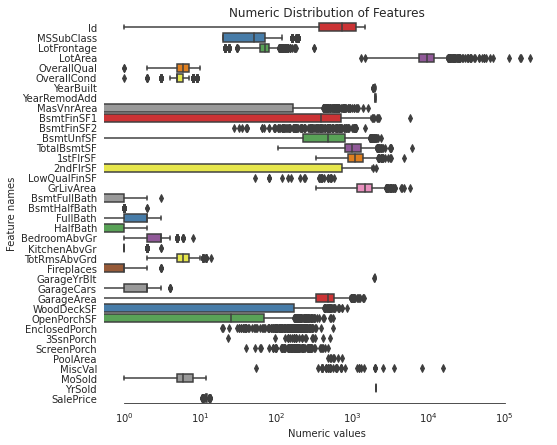

In [ ]:
# Creating box plots for all numeric columns:
sns.set_style("white")
f, ax = plt.subplots(figsize=(8, 7))
ax.set_xscale("log")
ax = sns.boxplot(data=df[num_cols] , orient="h", palette="Set1")
ax.xaxis.grid(False)
ax.set(ylabel="Feature names")
ax.set(xlabel="Numeric values")
ax.set(title="Numeric Distribution of Features")
sns.despine(trim=True, left=True)

In [ ]:
# Stats
from scipy.stats import skew, norm
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax


skew(a, axis=0, bias=True, nan_policy='propagate')
    Compute the sample skewness of a data set.
    
    For normally distributed data, the skewness should be about zero. For
    unimodal continuous distributions, a skewness value greater than zero means
    that there is more weight in the right tail of the distribution. The
    function `skewtest` can be used to determine if the skewness value
    is close enough to zero, statistically speaking.

In [ ]:
# Finding skewed numerical columns:
skew_columns = df[num_cols].apply(lambda x: skew(x)).sort_values(ascending=False)

high_skew = skew_columns[skew_columns > 0.5]
skew_index = high_skew.index

print("There are {} numerical features with Skew > 0.5 :".format(high_skew.shape[0]))
skewness = pd.DataFrame({'Skew' :high_skew})
skew_columns

There are 26 numerical features with Skew > 0.5 :


MiscVal          24.451640
PoolArea         14.813135
LotArea          12.195142
3SsnPorch        10.293752
LowQualFinSF      9.002080
KitchenAbvGr      4.483784
BsmtFinSF2        4.250888
ScreenPorch       4.117977
BsmtHalfBath      4.099186
EnclosedPorch     3.086696
MasVnrArea        2.674865
LotFrontage       2.382499
OpenPorchSF       2.361912
BsmtFinSF1        1.683771
WoodDeckSF        1.539792
TotalBsmtSF       1.522688
MSSubClass        1.406210
1stFlrSF          1.375342
GrLivArea         1.365156
BsmtUnfSF         0.919323
2ndFlrSF          0.812194
OverallCond       0.692355
TotRmsAbvGrd      0.675646
HalfBath          0.675203
Fireplaces        0.648898
BsmtFullBath      0.595454
OverallQual       0.216721
MoSold            0.211835
BedroomAbvGr      0.211572
GarageArea        0.179796
SalePrice         0.121222
YrSold            0.096170
FullBath          0.036524
Id                0.000000
GarageCars       -0.342197
YearRemodAdd     -0.503044
YearBuilt        -0.612831
G

boxcox_normmax(x, brack=(-2.0, 2.0), method='pearsonr')
    Compute optimal Box-Cox transform parameter for input data.
    
    Parameters
    ----------
    x : array_like
        Input array.
    brack : 2-tuple, optional
        The starting interval for a downhill bracket search with
        `optimize.brent`.  Note that this is in most cases not critical; the
        final result is allowed to be outside this bracket.
    method : str, optional
        The method to determine the optimal transform parameter (`boxcox`
        ``lmbda`` parameter). Options are:
    
        'pearsonr'  (default)
            Maximizes the Pearson correlation coefficient between
            ``y = boxcox(x)`` and the expected values for ``y`` if `x` would be
            normally-distributed.
    
        'mle'
            Minimizes the log-likelihood `boxcox_llf`.  This is the method used
            in `boxcox`.
    
        'all'
            Use all optimization methods available, and return all results.
            Useful to compare different methods.

In [ ]:
# Lets normalize skewed features
for i in skew_index:
    df[i] = boxcox1p(df[i], boxcox_normmax(df[i] + 1))

/opt/conda/lib/python3.7/site-packages/scipy/stats/stats.py:3845: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/opt/conda/lib/python3.7/site-packages/scipy/stats/stats.py:3875: PearsonRNearConstantInputWarning: An input array is nearly constant; the computed correlation coefficent may be inaccurate.
  warnings.warn(PearsonRNearConstantInputWarning())


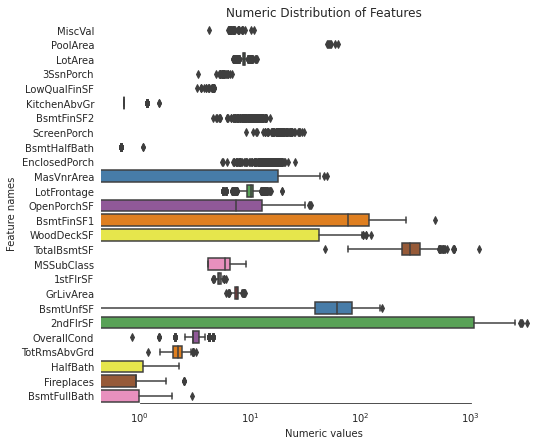

In [ ]:
# Let's make sure we handled all the skewed values
sns.set_style("white")
f, ax = plt.subplots(figsize=(8, 7))
ax.set_xscale("log")
ax = sns.boxplot(data=df[skew_index] , orient="h", palette="Set1")
ax.xaxis.grid(False)
ax.set(ylabel="Feature names")
ax.set(xlabel="Numeric values")
ax.set(title="Numeric Distribution of Features")
sns.despine(trim=True, left=True)
#Now all the numerical seems to be normally distributed

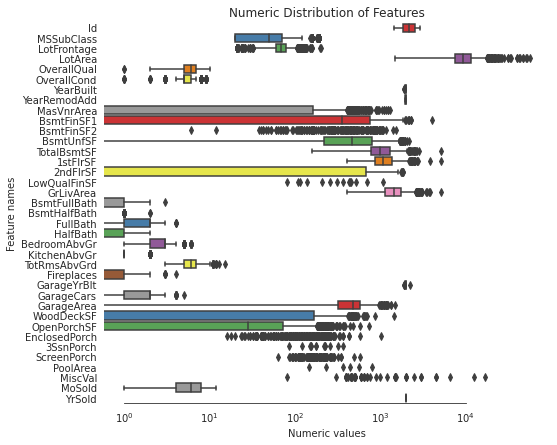

In [ ]:
#Lets do the same operations to the test data:
# Creating box plots for all numeric columns:
sns.set_style("white")
f, ax = plt.subplots(figsize=(8, 7))
ax.set_xscale("log")
ax = sns.boxplot(data=test[test_num_cols] , orient="h", palette="Set1")
ax.xaxis.grid(False)
ax.set(ylabel="Feature names")
ax.set(xlabel="Numeric values")
ax.set(title="Numeric Distribution of Features")
sns.despine(trim=True, left=True)

In [ ]:
# Finding skewed numerical columns:
skew_columns = test[test_num_cols].apply(lambda x: skew(x)).sort_values(ascending=False)

high_skew = skew_columns[skew_columns > 0.5]
skew_index = high_skew.index

print("There are {} numerical features with Skew > 0.5 :".format(high_skew.shape[0]))
skewness = pd.DataFrame({'Skew' :high_skew})
skew_columns

There are 25 numerical features with Skew > 0.5 :


PoolArea         20.176117
MiscVal          20.054543
LowQualFinSF     16.150628
3SsnPorch        12.511336
EnclosedPorch     4.664371
KitchenAbvGr      4.074860
BsmtFinSF2        4.038570
ScreenPorch       3.784349
BsmtHalfBath      3.779085
LotArea           3.112013
OpenPorchSF       2.685015
MasVnrArea        2.546947
WoodDeckSF        2.128569
1stFlrSF          1.556592
MSSubClass        1.345305
BsmtFinSF1        1.164876
GrLivArea         1.129240
BsmtUnfSF         0.919285
2ndFlrSF          0.911944
TotRmsAbvGrd      0.841731
Fireplaces        0.819015
TotalBsmtSF       0.813031
LotFrontage       0.719448
HalfBath          0.713993
BsmtFullBath      0.651195
OverallCond       0.448703
BedroomAbvGr      0.436174
GarageArea        0.300033
FullBath          0.295534
MoSold            0.182834
OverallQual       0.181010
YrSold            0.168813
Id                0.000000
GarageCars       -0.107068
GarageYrBlt      -0.170538
YearRemodAdd     -0.399495
YearBuilt        -0.587052
d

/opt/conda/lib/python3.7/site-packages/scipy/stats/stats.py:3845: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/opt/conda/lib/python3.7/site-packages/scipy/stats/stats.py:3875: PearsonRNearConstantInputWarning: An input array is nearly constant; the computed correlation coefficent may be inaccurate.
  warnings.warn(PearsonRNearConstantInputWarning())


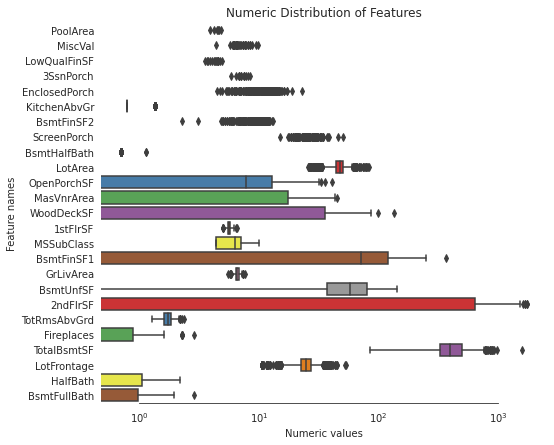

In [ ]:
# Lets normalize skewed features
for i in skew_index:
    test[i] = boxcox1p(test[i], boxcox_normmax(test[i] + 1))
# Let's make sure we handled all the skewed values
sns.set_style("white")
f, ax = plt.subplots(figsize=(8, 7))
ax.set_xscale("log")
ax = sns.boxplot(data=test[skew_index] , orient="h", palette="Set1")
ax.xaxis.grid(False)
ax.set(ylabel="Feature names")
ax.set(xlabel="Numeric values")
ax.set(title="Numeric Distribution of Features")
sns.despine(trim=True, left=True)
#Now all the numerical seems to be normally distributed

In [ ]:
df["SalePrice"]

0       12.247699
1       12.109016
2       12.317171
3       11.849405
4       12.429220
          ...    
1455    12.072547
1456    12.254868
1457    12.493133
1458    11.864469
1459    11.901590
Name: SalePrice, Length: 1460, dtype: float64

<font color= "red">
2.3. Handling the Text and Categorical Columns:

In [ ]:

cat_cols=df.columns[df.dtypes== "object"]
cat_cols

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

In [ ]:
test_cat_cols = test.columns[test.dtypes=="object"]
test_cat_cols

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

In [ ]:
df[cat_cols].head()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,Gd,Typ,Gd,Attchd,RFn,TA,TA,Y,WD,Normal
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,...,TA,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,...,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,WD,Abnorml
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,...,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal


In [ ]:
df= pd.get_dummies(df,columns =["MSZoning","Street","LotShape","LandContour",'LandSlope', 
                                'LotConfig','Neighborhood', 'Condition1', 'BldgType', 
                                'RoofStyle',  'MasVnrType', 'ExterQual', 
                                'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 
                                'BsmtFinType1', 'HeatingQC', 'CentralAir', 
                                'KitchenQual', 'FireplaceQu', 'GarageType', 'GarageFinish', 
                                'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition'],drop_first =True)
df.head() #Now we transform all of the categorical  columns into numerical values

,Id,MSSubClass,LotFrontage,LotArea,Utilities,Condition2,HouseStyle,OverallQual,OverallCond,YearBuilt,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,6.281283,9.826839,8.670456,AllPub,Norm,2Story,7,3.036931,2003,...,0,0,0,0,1,0,0,0,1,0
1,2,4.146687,10.795703,8.787629,AllPub,Norm,1Story,6,4.241668,1976,...,0,0,0,0,1,0,0,0,1,0
2,3,6.281283,10.031076,8.933083,AllPub,Norm,2Story,7,3.036931,2001,...,0,0,0,0,1,0,0,0,1,0
3,4,6.622580,9.472852,8.782836,AllPub,Norm,2Story,7,3.036931,1915,...,0,0,0,0,1,0,0,0,0,0
4,5,6.281283,11.034378,9.150118,AllPub,Norm,2Story,8,3.036931,2000,...,0,0,0,0,1,0,0,0,1,0


In [ ]:
df.drop(["Exterior2nd","Condition2","BsmtFinType2","Utilities", 'HouseStyle',
         'RoofMatl', 'Exterior1st',  'Heating', 'Electrical', 'Functional', 
        'GarageQual'],axis=1,inplace=True) # We drop 3 columns because they have the same information with some columns
df.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,6.281283,9.826839,8.670456,7,3.036931,2003,2003,19.340338,118.098021,...,0,0,0,0,1,0,0,0,1,0
1,2,4.146687,10.795703,8.787629,6,4.241668,1976,1976,0.000000,147.125769,...,0,0,0,0,1,0,0,0,1,0
2,3,6.281283,10.031076,8.933083,7,3.036931,2001,2002,17.687636,91.750453,...,0,0,0,0,1,0,0,0,1,0
3,4,6.622580,9.472852,8.782836,7,3.036931,1915,1970,0.000000,52.861358,...,0,0,0,0,1,0,0,0,0,0
4,5,6.281283,11.034378,9.150118,8,3.036931,2000,2000,25.266438,112.267329,...,0,0,0,0,1,0,0,0,1,0


In [ ]:
df.info() # Now all the columns are numerical

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 163 entries, Id to SaleCondition_Partial
dtypes: float64(28), int64(10), uint8(125)
memory usage: 611.8 KB


In [ ]:
#Lets do the same operation for test data:
test[test_cat_cols].head()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RH,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,...,TA,Typ,Gd,Attchd,Unf,TA,TA,Y,WD,Normal
1,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,...,Gd,Typ,Gd,Attchd,Unf,TA,TA,Y,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,...,TA,Typ,TA,Attchd,Fin,TA,TA,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,...,Gd,Typ,Gd,Attchd,Fin,TA,TA,Y,WD,Normal
4,RL,Pave,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,...,Gd,Typ,Gd,Attchd,RFn,TA,TA,Y,WD,Normal


Utilities, test["HouseStyle"],RoofMatl, Exterior1st, Heating,Electrical,Functional, GarageQual

In [ ]:
test= pd.get_dummies(test,columns =["MSZoning","Street","LotShape","LandContour",'LandSlope', 
                                    'LotConfig','Neighborhood', 'Condition1', 'BldgType', 
                                    'RoofStyle',  'MasVnrType', 'ExterQual', 
                                    'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 
                                    'BsmtFinType1', 'HeatingQC', 'CentralAir', 
                                    'KitchenQual', 'FireplaceQu', 'GarageType', 'GarageFinish', 
                                    'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition'],drop_first =True)
test.head() #Now we transform all of the categorical  columns into numerical values

,Id,MSSubClass,LotFrontage,LotArea,Utilities,Condition2,HouseStyle,OverallQual,OverallCond,YearBuilt,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1461,4.346649,27.830492,50.728192,AllPub,Norm,1Story,5,6,1961,...,0,0,0,0,1,0,0,0,1,0
1,1462,4.346649,28.076422,54.118575,AllPub,Norm,1Story,6,6,1958,...,0,0,0,0,1,0,0,0,1,0
2,1463,6.707526,26.333969,53.590846,AllPub,Norm,2Story,5,5,1997,...,0,0,0,0,1,0,0,0,1,0
3,1464,6.707526,27.335706,48.336767,AllPub,Norm,2Story,6,6,1998,...,0,0,0,0,1,0,0,0,1,0
4,1465,8.545975,17.864759,38.773077,AllPub,Norm,1Story,8,5,1992,...,0,0,0,0,1,0,0,0,1,0


In [ ]:
test.drop(["Exterior2nd","Condition2","BsmtFinType2","Utilities", 
           'HouseStyle', 'RoofMatl', 'Exterior1st',  'Heating', 
           'Electrical', 'Functional', 'GarageQual'],axis=1,inplace=True) # We drop 3 columns because they have the same information with some columns
test.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1461,4.346649,27.830492,50.728192,5,6,1961,1961,0.000000,87.054268,...,0,0,0,0,1,0,0,0,1,0
1,1462,4.346649,28.076422,54.118575,6,6,1958,1958,14.470534,137.226179,...,0,0,0,0,1,0,0,0,1,0
2,1463,6.707526,26.333969,53.590846,5,5,1997,1998,0.000000,123.768689,...,0,0,0,0,1,0,0,0,1,0
3,1464,6.707526,27.335706,48.336767,6,6,1998,1998,6.113887,103.082889,...,0,0,0,0,1,0,0,0,1,0
4,1465,8.545975,17.864759,38.773077,8,5,1992,1992,0.000000,59.033341,...,0,0,0,0,1,0,0,0,1,0


In [ ]:
test.info() # Now all the columns are numerical for test data and both train and test data is ready for ML algorithms

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Columns: 162 entries, Id to SaleCondition_Partial
dtypes: float64(28), int64(9), uint8(125)
memory usage: 600.0 KB


In [ ]:
#Id column is just index, so we need to drop it totally from the dataframe:
df.drop("Id",axis=1,inplace=True)
df.head()


,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,6.281283,9.826839,8.670456,7,3.036931,2003,2003,19.340338,118.098021,0.0,...,0,0,0,0,1,0,0,0,1,0
1,4.146687,10.795703,8.787629,6,4.241668,1976,1976,0.000000,147.125769,0.0,...,0,0,0,0,1,0,0,0,1,0
2,6.281283,10.031076,8.933083,7,3.036931,2001,2002,17.687636,91.750453,0.0,...,0,0,0,0,1,0,0,0,1,0
3,6.622580,9.472852,8.782836,7,3.036931,1915,1970,0.000000,52.861358,0.0,...,0,0,0,0,1,0,0,0,0,0
4,6.281283,11.034378,9.150118,8,3.036931,2000,2000,25.266438,112.267329,0.0,...,0,0,0,0,1,0,0,0,1,0


In [ ]:
test_id = test["Id"]
test_id

0       1461
1       1462
2       1463
3       1464
4       1465
        ... 
1454    2915
1455    2916
1456    2917
1457    2918
1458    2919
Name: Id, Length: 1459, dtype: int64

In [ ]:

test.drop("Id",axis=1,inplace=True)
test.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,4.346649,27.830492,50.728192,5,6,1961,1961,0.000000,87.054268,7.328389,...,0,0,0,0,1,0,0,0,1,0
1,4.346649,28.076422,54.118575,6,6,1958,1958,14.470534,137.226179,0.000000,...,0,0,0,0,1,0,0,0,1,0
2,6.707526,26.333969,53.590846,5,5,1997,1998,0.000000,123.768689,0.000000,...,0,0,0,0,1,0,0,0,1,0
3,6.707526,27.335706,48.336767,6,6,1998,1998,6.113887,103.082889,0.000000,...,0,0,0,0,1,0,0,0,1,0
4,8.545975,17.864759,38.773077,8,5,1992,1992,0.000000,59.033341,0.000000,...,0,0,0,0,1,0,0,0,1,0


## 2.3. Select and Train a Model:

In [ ]:
X=df.drop("SalePrice",axis=1)
X = X.values
X.shape

(1460, 161)

In [ ]:

y.shape

(1460,)

In [ ]:
test= test.values
test.shape

(1459, 161)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train,y_test=train_test_split(X,y, test_size=0.05,random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1387, 161)
(73, 161)
(1387,)
(73,)


In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
predictions1 = model.predict(X_test)


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
print(mean_absolute_error(y_test,predictions1))
print(mean_squared_error(y_test,predictions1))
print(np.sqrt(mean_squared_error(y_test,predictions1)))

15703.051291169468
499972487.20153505
22360.06456165847


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:>

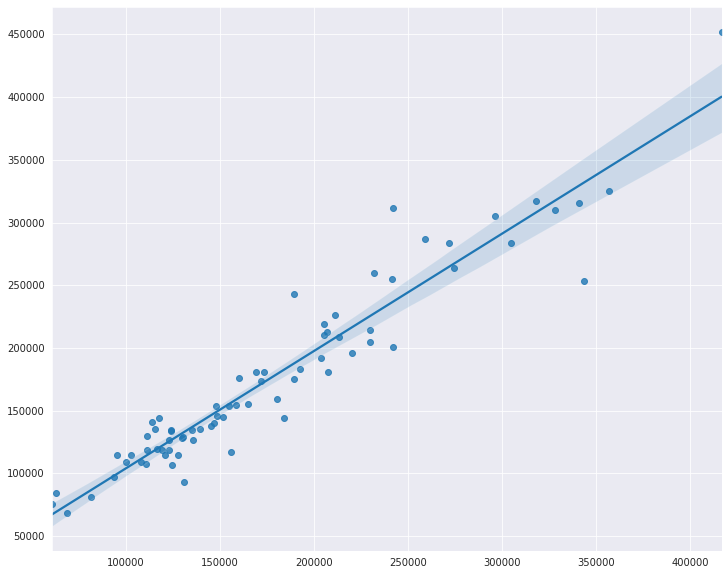

In [ ]:
import seaborn as sns
sns.set_style("darkgrid")
plt.figure(figsize=(12,10))
sns.regplot(predictions1,y_test)

<font color="green">
Lets use another model:

In [ ]:
from sklearn.tree import DecisionTreeRegressor
dtree = DecisionTreeRegressor()
dtree.fit(X_train,y_train)
predictions2 = dtree.predict(X_test)
print(mean_absolute_error(y_test,predictions2))
print(mean_squared_error(y_test,predictions2))
print(np.sqrt(mean_squared_error(y_test,predictions2))) 

24327.72602739726
1769783936.8767123
42068.800040846334


In [ ]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = dtree, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 65.62 %
Standard Deviation: 16.90 %


<font color="green">
Lets use another model:

In [ ]:
from sklearn.ensemble import RandomForestRegressor
random_forest = RandomForestRegressor()
random_forest.fit(X_train,y_train)
predictions_rforest= random_forest.predict(X_test)
print(mean_absolute_error(y_test,predictions_rforest))
print(mean_squared_error(y_test,predictions_rforest))
print(np.sqrt(mean_squared_error(y_test,predictions_rforest)))

14336.692876712326
615762511.1053314
24814.562480634864


In [ ]:
accuracies = cross_val_score(estimator = random_forest, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))
#It seems random fores has very good accuracy in test data, is the best to this point

Accuracy: 86.05 %
Standard Deviation: 6.48 %


<font color="green">
Lets use another model:

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = [
{'n_estimators': [ 100,120,150], 'max_features': [ 12,14,16]},
{'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3,
4]},
]
forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg, param_grid, cv=10,
scoring='neg_mean_squared_error',
return_train_score=True)
grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
print("Best Accuracy: {:.2f} %".format(-best_accuracy*100))
print("Best Parameters:", best_parameters)

Best Accuracy: 85583785178.25 %
Best Parameters: {'max_features': 14, 'n_estimators': 150}


In [ ]:
grid_predictions = grid_search.predict(X_test)
print(mean_absolute_error(y_test,grid_predictions))
print(mean_squared_error(y_test,grid_predictions))
print(np.sqrt(mean_squared_error(y_test,grid_predictions))) #The predictions is very close to Random Forest

14333.342465753425
613375807.3001012
24766.425000393196


<font color="green">
Lets use another Other Ensemble and Boosting Models to have a better performance:

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor, AdaBoostRegressor, BaggingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.svm import SVR
from mlxtend.regressor import StackingCVRegressor
import lightgbm as lgb
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.linear_model import LassoCV,RidgeCV,ElasticNetCV
from sklearn.feature_selection import RFE
from sklearn.model_selection import GridSearchCV,KFold,RandomizedSearchCV,StratifiedKFold,cross_val_score

In [ ]:
kfold= KFold(n_splits=11,random_state=42,shuffle=True) #kfold cross validation

Light Gradient Boosting Regressor:

Gradient boosting refers to a class of ensemble machine learning algorithms that can be used for classification or regression predictive modeling problems.

Ensembles are constructed from decision tree models. Trees are added one at a time to the ensemble and fit to correct the prediction errors made by prior models. This is a type of ensemble machine learning model referred to as boosting.

In [ ]:
lightgbm = LGBMRegressor(objective='regression', 
                       num_leaves=6,
                       learning_rate=0.01, 
                       n_estimators=7000,
                       max_bin=200, 
                       bagging_fraction=0.8,
                       bagging_freq=4, 
                       bagging_seed=8,
                       feature_fraction=0.2,
                       feature_fraction_seed=8,
                       min_sum_hessian_in_leaf = 11,
                       verbose=-1,
                       random_state=42)

In [ ]:
lightgbm.fit(X_train,y_train)
lightgbm_predictions = lightgbm.predict(X_test)
print(mean_absolute_error(y_test,lightgbm_predictions))
print(mean_squared_error(y_test,lightgbm_predictions))
print(np.sqrt(mean_squared_error(y_test,lightgbm_predictions))) 
#This is better than both Random Forest and Grid Search Results

[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
15806.979393597552
578101369.0109527
24043.73866541875


You could use RobustScaler if you have outliers and want to reduce their influence. However, you might be better off removing the outliers, instead. Use StandardScaler if you need a relatively normal distribution.
So we will use RobustScaler with Support Vector Regressor

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
# Support Vector Regressor
svr = make_pipeline(RobustScaler(), SVR(C= 20, epsilon= 0.008, gamma=0.00015))

In [ ]:
svr.fit(X_train,y_train)
svr_predictions= svr.predict(X_test)
print(mean_absolute_error(y_test,svr_predictions))
print(mean_squared_error(y_test,svr_predictions))
print(np.sqrt(mean_squared_error(y_test,svr_predictions)))

57509.60840865362
5647874066.631452
75152.33906294235


<font color="green">
Lets try XGBoost:

In [ ]:
from xgboost import XGBRegressor
xgboost = XGBRegressor(learning_rate=0.01,
                       n_estimators=6000,
                       max_depth=4,
                       min_child_weight=0,
                       gamma=0.6,
                       subsample=0.7,
                       colsample_bytree=0.7,
                       objective='reg:squarederror',
                       nthread=-1,
                       scale_pos_weight=1,
                       seed=27,
                       reg_alpha=0.00006,
                       random_state=42)

In [ ]:
xgboost.fit(X_train, y_train)
xgboost_predictions =xgboost.predict(X_test)

In [ ]:
print(mean_absolute_error(y_test,xgboost_predictions))
print(mean_squared_error(y_test,xgboost_predictions))
print(np.sqrt(mean_squared_error(y_test,xgboost_predictions)))

12872.809931506848
467917658.0568814
21631.404440231832


<font color="green">
Lets try GradientBoostingRegressor:

In [ ]:
gbr = GradientBoostingRegressor(n_estimators=6000,
                                learning_rate=0.01,
                                max_depth=4,
                                max_features='sqrt',
                                min_samples_leaf=15,
                                min_samples_split=10,
                                loss='huber',
                                random_state=42) 

In [ ]:
gbr.fit(X_train,y_train)
gbr_predictions = gbr.predict(X_test)
print(mean_absolute_error(y_test,gbr_predictions))
print(mean_squared_error(y_test,gbr_predictions))
print(np.sqrt(mean_squared_error(y_test,gbr_predictions))) 

14222.825039068772
516966859.26152104
22736.905226119077


<font color="green">
Lets try ElasticNetCV:

In [ ]:
alpha_elnet= [0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007]
l1ratio_elnet = [0.8, 0.85, 0.9, 0.95, 0.99, 1]
elasticnet = make_pipeline(RobustScaler(), ElasticNetCV(max_iter=1000000, alphas=alpha_elnet, \
                                                        cv=kfold, l1_ratio=l1ratio_elnet))

In [ ]:
elasticnet.fit(X_train,y_train)
elastic_predictions = elasticnet.predict(X_test)
print(mean_absolute_error(y_test,elastic_predictions))
print(mean_squared_error(y_test,elastic_predictions))
print(np.sqrt(mean_squared_error(y_test,elastic_predictions)))

15622.218450022976
493234387.02779526
22208.880814390337


<font color="green">
Lets try LassoCV:

In [ ]:
alphas_lasso = [0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008] #Best value of alpha parmaters for lasso
lasso = make_pipeline(RobustScaler(), LassoCV(alphas=alphas_lasso, cv=kfold))

In [ ]:
lasso.fit(X_train,y_train)
lasso_predictions = lasso.predict(X_test)
print(mean_absolute_error(y_test,lasso_predictions))
print(mean_squared_error(y_test,lasso_predictions))
print(np.sqrt(mean_squared_error(y_test,lasso_predictions)))

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:528: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1249758107.4716797, tolerance: 805994842.3019913
  tol, rng, random, positive)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:528: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 72515775675.50568, tolerance: 812167832.7548977
  tol, rng, random, positive)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:528: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 53127302673.65637, tolerance: 804011685.2341315
  tol, rng, random, positive)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:528: ConvergenceWarning: Objective did not converge. You might want to incre

15703.054267089412
499972196.82878304
22360.058068546758


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6495761602.214478, tolerance: 880523345.1462998
  positive)


<font color="green">
Lets try StackingCVRegressor:

In [ ]:
# Stack up all the models that performs better than the others, optimized using xgboost
stack_reg = StackingCVRegressor(regressors=(xgboost, lightgbm, random_forest,
                                            gbr,svr,lasso,elasticnet),
                                meta_regressor=xgboost,
                                use_features_in_secondary=True)
stack_reg.fit(X_train,y_train)
stack_predictions = stack_reg.predict(X_test)
print(mean_absolute_error(y_test,stack_predictions))
print(mean_squared_error(y_test,stack_predictions))
print(np.sqrt(mean_squared_error(y_test,stack_predictions))) 

[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] baggi

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:528: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 330993619848.1648, tolerance: 613144547.8431935
  tol, rng, random, positive)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:528: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1203102964.7490234, tolerance: 613144547.8431935
  tol, rng, random, positive)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:528: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 320512499323.8916, tolerance: 604238034.819
  tol, rng, random, positive)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:528: ConvergenceWarning: Objective did not converge. You might want to increase 

[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:528: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1249758107.4716797, tolerance: 805994842.3019913
  tol, rng, random, positive)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:528: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 72515775675.50568, tolerance: 812167832.7548977
  tol, rng, random, positive)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:528: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 53127302673.65637, tolerance: 804011685.2341315
  tol, rng, random, positive)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:528: ConvergenceWarning: Objective did not converge. You might want to incre

12715.42578125
429138871.6629357
20715.6672994846


<font color="green">
Lets try a blending version of best models we have used above:

In [ ]:
# Blend models in order to make the final predictions more robust to overfitting
blend_predictions=(0.025* elasticnet.predict(X_test)) + \
            (0.025 * lasso.predict(X_test)) + \
            (0.025 * random_forest.predict(X_test)) + \
            (0.025* svr.predict(X_test)) + \
            (0.62 * gbr.predict(X_test)) + \
            (0.03 * xgboost.predict(X_test)) + \
            (0.03 * lightgbm.predict(X_test)) + \
            (0.22 * stack_reg.predict(np.array(X_test))) 

In [ ]:
print(mean_absolute_error(y_test,blend_predictions))
print(mean_squared_error(y_test,blend_predictions))
print(np.sqrt(mean_squared_error(y_test,blend_predictions))) 
#As we can see the blended version of the models outperforms every single model:

13036.219072751685
443243080.0039221
21053.338927683708


Lets try ANNs:

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam

In [ ]:

rs=RobustScaler()

In [ ]:
X_deep_train=rs.fit_transform(X_train)
X_deep_train

array([[ 0.52958039, -0.55034641, -0.24774398, ...,  0.        ,
         0.        ,  0.        ],
       [-0.70468602,  1.39135458,  0.71667979, ...,  0.        ,
        -1.        ,  1.        ],
       [ 0.81278244,  0.        , -2.79604618, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-0.70468602, -0.55034641, -0.35179714, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        , -0.84592121, -0.5086142 , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.81278244, -0.96886517, -2.22129397, ...,  0.        ,
         0.        ,  0.        ]])

In [ ]:
X_deep_test =rs.transform(X_test)
X_deep_test

array([[-0.70468602, -0.00260865, -0.28357768, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.1574659 ,  1.30739869,  0.59399996, ...,  0.        ,
         0.        ,  0.        ],
       [-0.41021415, -0.78549811, -0.13666642, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.52958039, -0.32483795, -0.70796326, ...,  0.        ,
        -1.        ,  0.        ],
       [-0.70468602, -0.84592121, -0.32958886, ...,  0.        ,
         0.        ,  0.        ],
       [-0.70468602,  0.35207249, -0.23438003, ...,  0.        ,
         0.        ,  0.        ]])

In [ ]:

model = Sequential()
model.add(Dense(200, kernel_initializer='normal', activation='relu'))
model.add(Dense(100, kernel_initializer='normal', activation='relu'))
model.add(Dense(50, kernel_initializer='normal', activation='relu'))
model.add(Dense(25, kernel_initializer='normal', activation='relu'))
model.add(Dense(1))
# Compile model
model.compile(loss='mean_squared_error', optimizer="adam")



model.fit(np.array(X_train), np.array(y_train), epochs=100, batch_size=10)


Epoch 1/100
139/139 [==============================] - 1s 4ms/step - loss: 28116595331.6571
Epoch 2/100
139/139 [==============================] - 0s 1ms/step - loss: 5142668929.8286
Epoch 3/100
139/139 [==============================] - 0s 2ms/step - loss: 4275901449.1429
Epoch 4/100
139/139 [==============================] - 0s 2ms/step - loss: 4391095032.2286
Epoch 5/100
139/139 [==============================] - 0s 1ms/step - loss: 3086340289.8286
Epoch 6/100
139/139 [==============================] - 0s 1ms/step - loss: 3100259607.7714
Epoch 7/100
139/139 [==============================] - 0s 1ms/step - loss: 2187625590.8571
Epoch 8/100
139/139 [==============================] - 0s 1ms/step - loss: 1961831123.2000
Epoch 9/100
139/139 [==============================] - 0s 1ms/step - loss: 2174393128.2286
Epoch 10/100
139/139 [==============================] - 0s 1ms/step - loss: 2078828262.8571
Epoch 11/100
139/139 [==============================] - 0s 1ms/step - loss: 2344224391.3

In [ ]:
deep_predictions=model.predict(X_test)

In [ ]:
print(mean_absolute_error(y_test,deep_predictions))
print(mean_squared_error(y_test,deep_predictions))
print(np.sqrt(mean_squared_error(y_test,deep_predictions)))

19917.43696489726
946429270.3206979
30764.09059797962


In [ ]:
submission_sample = pd.read_csv("../input/house-prices-advanced-regression-techniques/sample_submission.csv")
submission_sample.shape

(1459, 2)

In [ ]:
pd.DataFrame(X_train)

,0,1,2,3,4,5,6,7,8,9,...,151,152,153,154,155,156,157,158,159,160
0,7.202599,9.472852,8.680621,3.0,2.576130,1950.0,1950.0,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,4.146687,11.923304,9.059771,9.0,3.036931,2009.0,2010.0,35.813716,252.823726,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,7.903777,10.167396,7.678791,6.0,3.036931,1996.0,1997.0,0.000000,149.648806,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,6.281283,10.915958,8.773369,8.0,3.036931,1997.0,1998.0,27.536491,156.703026,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,6.281283,11.710022,8.873498,7.0,3.036931,1993.0,1994.0,33.426002,166.286072,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1382,4.146687,10.673539,8.760163,6.0,3.036931,2006.0,2006.0,0.000000,11.347082,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1383,5.891414,9.826839,8.597354,4.0,2.071043,1928.0,1950.0,0.000000,108.414112,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1384,4.146687,9.472852,8.639714,5.0,3.863872,1955.0,1990.0,0.000000,44.323823,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1385,5.891414,9.099833,8.578063,7.0,4.241668,1918.0,1998.0,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
def latest_predictions(features): 
    return ((0.025* elasticnet.predict(features)) + \
            (0.025 * lasso.predict(features)) + \
            (0.025 * random_forest.predict(features)) + \
            (0.025* svr.predict(features)) + \
            (0.62 * gbr.predict(features)) + \
            (0.03 * xgboost.predict(features)) + \
            (0.03 * lightgbm.predict(features)) + \
            (0.22 * stack_reg.predict(np.array(features))))

In [ ]:
submission_sample.iloc[:,1] = latest_predictions(test)
submission_sample

/opt/conda/lib/python3.7/site-packages/xgboost/data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +
/opt/conda/lib/python3.7/site-packages/xgboost/data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


,Id,SalePrice
0,1461,202534.937073
1,1462,231508.228307
2,1463,254880.732808
3,1464,266097.496405
4,1465,289575.834548
...,...,...
1454,2915,152455.959035
1455,2916,151389.146038
1456,2917,243133.575856
1457,2918,209340.585248


In [ ]:
q1 = submission_sample['SalePrice'].quantile(0.005)
q2 = submission_sample['SalePrice'].quantile(0.995)
submission_sample['SalePrice'] = submission_sample['SalePrice'].apply(lambda x: x if x > q1 else x*0.77)
submission_sample['SalePrice'] = submission_sample['SalePrice'].apply(lambda x: x if x < q2 else x*1.1)


In [ ]:
submission_sample.to_csv("new_submission_regression4.csv", index=False)